In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from sklearn import linear_model

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (10,10)
legend_fontsize = 16

# Линейная регрессия

## Оверфиттинг

[ 0.19776457]
[ 1.5374564   0.1134138  -0.58267144]
[ 1.67933184 -0.91229364 -0.46717729  0.47152906 -0.10459187 -0.02141321]
[ 1.85662201  0.8509196  -1.77378903 -2.00218647  1.42645537  0.74929813
 -0.43405016]
[   3.99525924   12.55649775  -35.118293    -52.63779034  129.56568645
   28.086373   -132.95072217   25.47980732   36.42834651  -12.73036247]


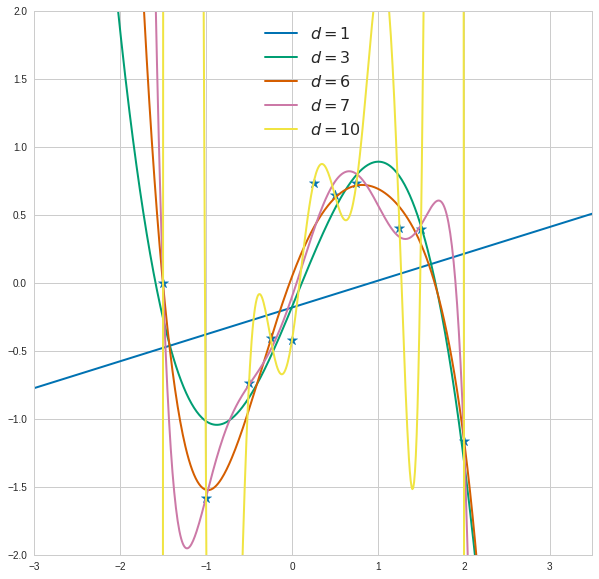

In [13]:
## Исходная функция
orig = lambda x : np.sin(2*x)

## X-координаты точек данных
xd = np.array([-3, -2, -1, -0.5, 0, 0.5, 1, 1.5, 2.5, 3, 4]) / 2
num_points = len(xd)

## Данные
data = orig(xd) + np.random.normal(0, .25, num_points)

## Для 
xs = np.arange(xd[0]-1.5, xd[-1]+1.5, 0.01)

## Выделение полиномиальных признаков
xs_d = np.vstack([xs ** i for i in range(1, num_points+1)]).transpose()
xd_d = np.vstack([xd ** i for i in range(1, num_points+1)]).transpose()

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-2, 2))
ax.scatter(xd, data, marker='*', s=120)
# ax.plot(xs, orig(xs), linewidth=2, label="Исходная функция", color="black")

set_of_powers = [ 1, 3, 6, 7, 10 ]

for d in set_of_powers:
    cur_model = linear_model.LinearRegression(fit_intercept=True).fit( xd_d[:, :d], data )
    print(cur_model.coef_)
    ax.plot(xs, cur_model.predict( xs_d[:, :d] ), linewidth=2, label="$d=%d$" % d)

ax.legend(loc="upper center", fontsize=legend_fontsize)

plt.show()

## Добавим ещё данных

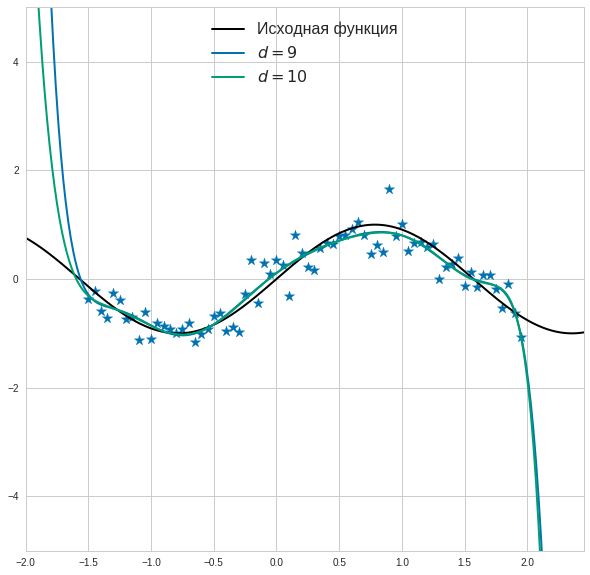

In [12]:
## Исходная функция
orig = lambda x : np.sin(2*x)

## X-координаты точек данных
xd_large = np.arange(-1.5, 2, 0.05)
num_points_l = len(xd_large)

## Данные
data_large = orig(xd_large) + np.random.normal(0, .25, num_points_l)

## Для 
xs = np.arange(xd_large[0]-.5, xd_large[-1]+.5, 0.01)

## Выделение полиномиальных признаков
xs_d = np.vstack([xs ** i for i in range(1, num_points+1)]).transpose()
xd_d_large = np.vstack([xd_large ** i for i in range(1, num_points+1)]).transpose()

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-5, 5))
ax.scatter(xd_large, data_large, marker='*', s=120)
ax.plot(xs, orig(xs), linewidth=2, label="Исходная функция", color="black")

set_of_powers = [ 9, 10 ]

for d in set_of_powers:
    cur_model = linear_model.LinearRegression(fit_intercept=True).fit( xd_d_large[:, :d], data_large )
    ax.plot(xs, cur_model.predict( xs_d[:, :d] ), linewidth=2, label="$d=%d$" % d)

ax.legend(loc="upper center", fontsize=legend_fontsize)

plt.show()

## Регуляризация

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[  1.68628498e+00  -8.30118152e-01  -5.82439308e-01   2.85015400e-01
   8.77169696e-03   3.76680931e-02  -1.50794289e-02   3.83470523e-03
  -3.68988328e-03   3.15320675e-04  -6.55194735e-04]
[  1.64873755e+00  -7.39423655e-01  -5.41449373e-01   1.97551017e-01
   1.43972186e-02   5.12015779e-02  -1.94654041e-02   6.50475122e-03
  -4.64885453e-03   7.45168408e-04  -8.12472906e-04]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.36015300e-02   2.80696285e-03
   3.24614498e-05   3.06294055e-05  -1.76342453e-03]
[ 0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]


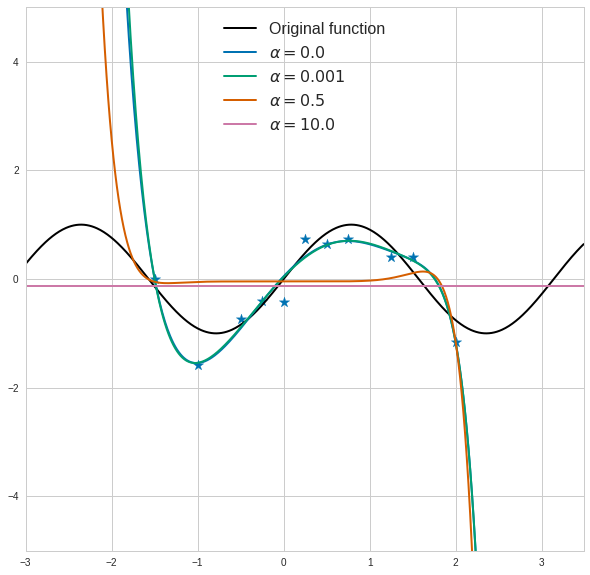

In [19]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-5, 5))
ax.scatter(xd, data, marker='*', s=120)
ax.plot(xs, orig(xs), linewidth=2, label="Original function", color="black")

m_ridge_0 = linear_model.Lasso(alpha=0.00, fit_intercept=True).fit( xd_d[:, :12], data )
ax.plot(xs, m_ridge_0.predict( xs_d[:, :12] ), linewidth=2, label="$\\alpha=0.0$")
print(m_ridge_0.coef_)

m_ridge_1 = linear_model.Lasso(alpha=0.001, fit_intercept=True).fit( xd_d[:, :12], data )
ax.plot(xs, m_ridge_1.predict( xs_d[:, :12] ), linewidth=2, label="$\\alpha=0.001$")
print(m_ridge_1.coef_)

m_ridge_2 = linear_model.Lasso(alpha=0.5, fit_intercept=True).fit( xd_d[:, :12], data )
ax.plot(xs, m_ridge_2.predict( xs_d[:, :12] ), linewidth=2, label="$\\alpha=0.5$")
print(m_ridge_2.coef_)

m_ridge_3 = linear_model.Lasso(alpha=1000.0, fit_intercept=True).fit( xd_d[:, :12], data )
ax.plot(xs, m_ridge_3.predict( xs_d[:, :12] ), linewidth=2, label="$\\alpha=10.0$")
print(m_ridge_3.coef_)

ax.legend(loc="upper center", fontsize=legend_fontsize)
plt.show()

## Усреднение

In [ ]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-5, 5))

res = []
for _ in range(100):
    cur_data = orig(xd) + np.random.normal(0, .25, num_points)
    cur_model = linear_model.Ridge(alpha=0.001, fit_intercept=True).fit( xd_d, cur_data )
    res.append(cur_model.predict( xs_d ))
    ax.plot(xs, res[-1], linewidth=.1, color="0.5")

ax.plot(xs, orig(xs), linewidth=2, label="Original function", color=palette[0])
ax.scatter(xd, orig(xd), marker='*', s=150, color=palette[0])

ax.plot(xs, np.mean( res, axis=0 ), linewidth=2, label="Averaged predictions", color=palette[2])
plt.show()